In [1]:
import os
import tweepy as tw
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt

In [3]:
df_Air= pd.read_csv('Indian_airlines.csv')

In [4]:
df_Air.Airlines.value_counts()

Spicejet      2932
AirIndia      2290
Indigo        1936
AirVistara    1595
AirAsia        604
Name: Airlines, dtype: int64

In [5]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
new_words = ['air','india','spicejet','indigo','ai','even', 'get', 'would','make', 'really', 'see', 'well', 'much', 'great', 'first', 'people', 'also', 'bad', 
             'show', 'way', 'thing', 'made', 'go', 'think', 'know', 'watch','look','many', 'co', 'http', 'mo',
            'twitter','thank','com', 'thanks','pic', 'bit','ly', 'country','www','Indigo','AirAsia','Spicejet','Air India',
            'AirVistara','GoFirst']
stop_words = stop_words.union(new_words)

In [6]:
df_Indigo=df_Air[df_Air.Airlines== 'Indigo']
df_AirAsia=df_Air[df_Air.Airlines== 'AirAsia']
df_Spicejet=df_Air[df_Air.Airlines== 'Spicejet']
df_AirIndia=df_Air[df_Air.Airlines== 'AirIndia']
df_AirVistara=df_Air[df_Air.Airlines== 'AirVistara']
#df_GoFirst=df_Air[df_Air.Airlines== 'GoFirst']

In [7]:
df_Indigo.reset_index(drop=True, inplace=True)
df_AirAsia.reset_index(drop=True, inplace=True)
df_Spicejet.reset_index(drop=True, inplace=True)
df_AirIndia.reset_index(drop=True, inplace=True)
df_AirVistara.reset_index(drop=True, inplace=True)

In [8]:
df_Air['created'] = pd.to_datetime(df_Air['created'])
df_Air2 = df_Air.set_index('created')

In [9]:
air_corp = []
from nltk.stem.wordnet import WordNetLemmatizer 
import re
for i in range(0, df_Air.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(df_Air2['Tweet_Text'][i]))
    
    #Convert to lowercase
    text = text.lower()
    ##Convert to list from string
    text = text.split()
    ##Lemmatizing
    lm = WordNetLemmatizer() 
       
    
    text = [lm.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    air_corp.append(text)

In [10]:
df_Air2['cltext'] = air_corp

In [11]:
df_Air2['senti'] = df_Air2['cltext'].apply(sid.polarity_scores)

# Calculating NPS of all airlines

In [12]:
df_Air2['compsenti'] = df_Air2['senti'].apply(lambda x: x['compound'])
print(df_Air2['compsenti'].mean())
df_Air2['possenti'] = df_Air2['senti'].apply(lambda x: x['pos'])
print(df_Air2['possenti'].mean())
df_Air2['negsenti'] = df_Air2['senti'].apply(lambda x: x['neg'])
print(df_Air2['negsenti'].mean())

0.06446976595062455
0.13803772576680512
0.09094880837875408


In [13]:
Pos_score=df_Air2.groupby(by='Airlines')['possenti'].mean().sort_values(ascending=False)

In [14]:
print(Pos_score)

Airlines
AirAsia       0.170727
Indigo        0.169122
AirVistara    0.164953
Spicejet      0.114683
AirIndia      0.114292
Name: possenti, dtype: float64


In [15]:
PS_df=pd.DataFrame(Pos_score)
PS_df['Airline']=['AirAsia','Indigo','AirVistara','Spicejet','AirIndia']
PS_df.columns.values[0]="PositiveScores"

In [16]:
PS_df

,PositiveScores,Airline
Airlines,,
AirAsia,0.170727,AirAsia
Indigo,0.169122,Indigo
AirVistara,0.164953,AirVistara
Spicejet,0.114683,Spicejet
AirIndia,0.114292,AirIndia


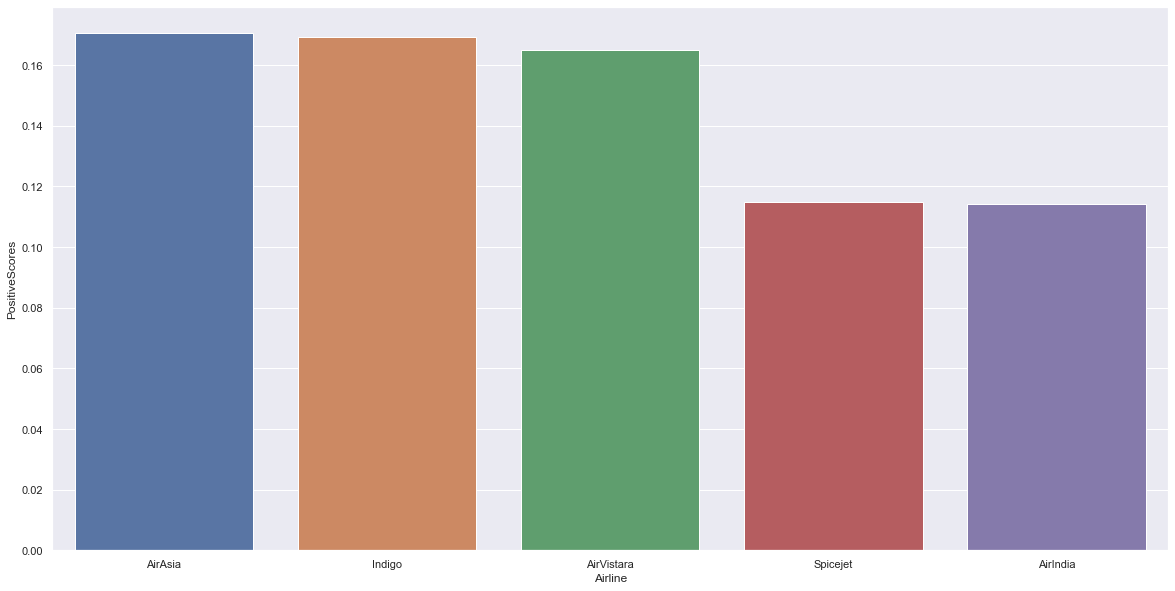

In [17]:
#Barplot of positive scores of Airlines
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot( x="Airline",y="PositiveScores",data=PS_df)
plt.show()

In [18]:
Neg_score=df_Air2.groupby(by='Airlines')['negsenti'].mean().sort_values(ascending=False)

In [19]:
Neg_score

Airlines
Spicejet      0.102761
AirAsia       0.096045
AirIndia      0.094935
Indigo        0.080897
AirVistara    0.073783
Name: negsenti, dtype: float64

In [20]:
NS_df=pd.DataFrame(Neg_score)
NS_df['Airline']=['Spicejet','AirAsia','AirIndia','Indigo','AirVistara']
NS_df.columns.values[0]="NegativeScores"

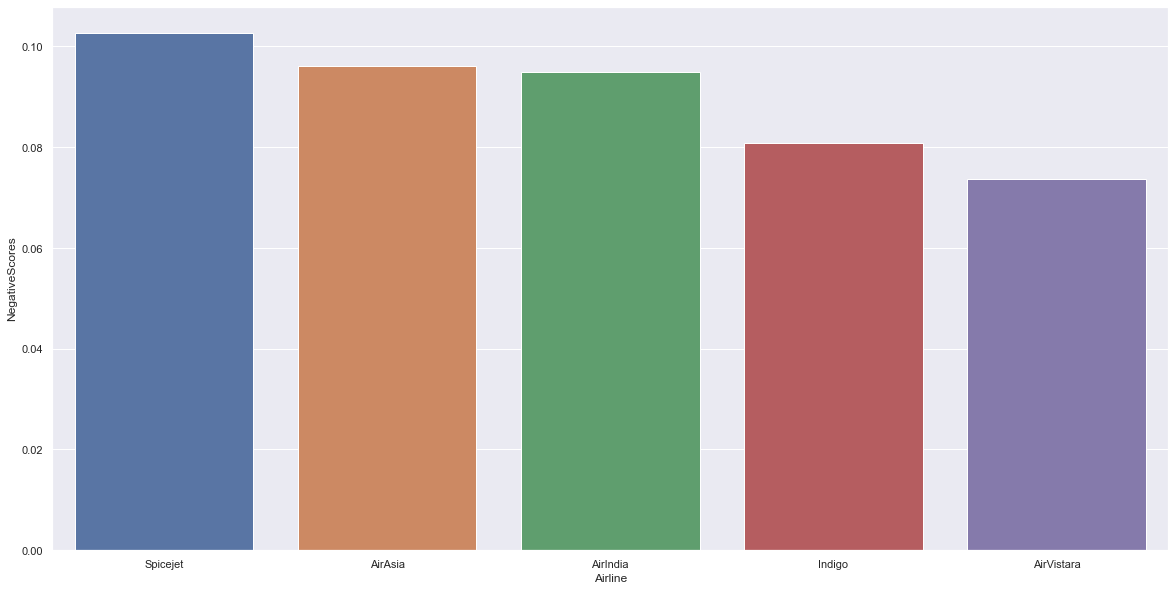

In [21]:
#Barplot of negative scores of Airlines
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot( x="Airline",y="NegativeScores",data=NS_df)
plt.show()

In [22]:
Comp_score=df_Air2.groupby(by='Airlines')['compsenti'].mean().sort_values(ascending=False)

In [23]:
Comp_score

Airlines
AirVistara    0.149578
Indigo        0.120816
AirAsia       0.114870
AirIndia      0.032185
Spicejet     -0.004202
Name: compsenti, dtype: float64

In [24]:
CS_df=pd.DataFrame(Comp_score)
CS_df['Airline']=['AirVistara','Indigo','AirAsia','AirIndia','Spicejet']
CS_df.columns.values[0]="CompositeScores"

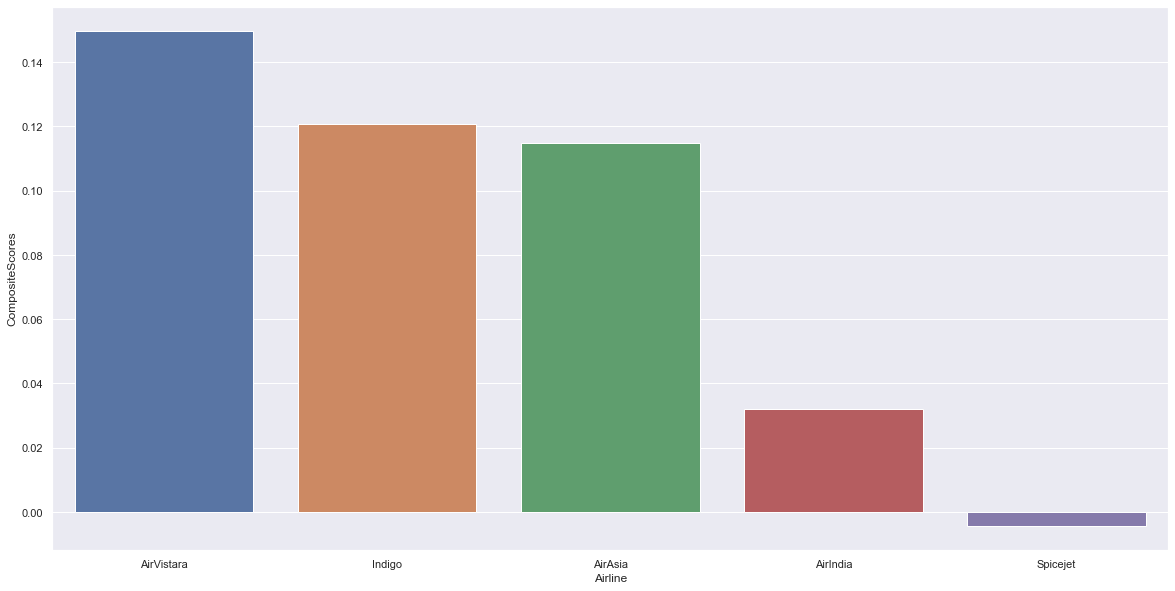

In [25]:
#Barplot of composite scores of Airlines
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot( x="Airline",y="CompositeScores",data=CS_df)
plt.show()

In [26]:
Diff=(round(df_Air2.groupby(by='Airlines')['possenti'].mean()-df_Air2.groupby(by='Airlines')['negsenti'].mean(),4)*100).sort_values(ascending=False)

In [27]:
Diff

Airlines
AirVistara    9.12
Indigo        8.82
AirAsia       7.47
AirIndia      1.94
Spicejet      1.19
dtype: float64

In [28]:
NPS_df=pd.DataFrame(Diff)
NPS_df['Airline']=['AirVistara','Indigo','AirAsia','AirIndia','Spicejet']
NPS_df.columns.values[0]="NPS"

In [29]:
NPS_df

,NPS,Airline
Airlines,,
AirVistara,9.12,AirVistara
Indigo,8.82,Indigo
AirAsia,7.47,AirAsia
AirIndia,1.94,AirIndia
Spicejet,1.19,Spicejet


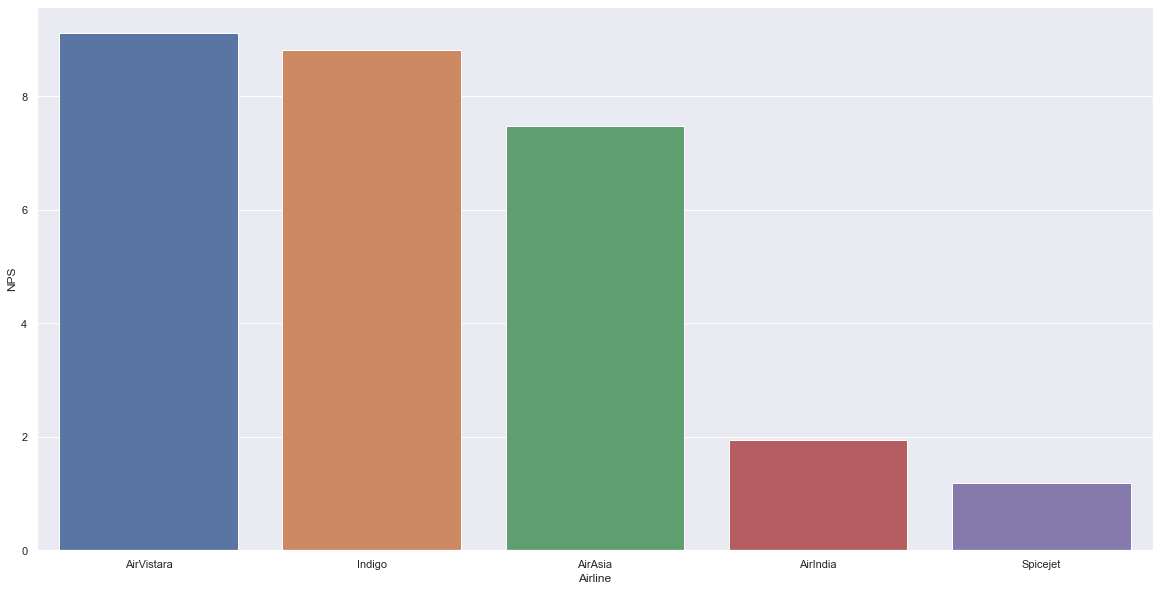

In [30]:
#Barplot of NPS scores of Airlines
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot( x="Airline",y="NPS",data=NPS_df)
plt.show()